In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
dfTrain2 = pd.read_csv('../data/TRAIN_TEST_corrected2/train_corrected2.csv')\
             .drop(['id', 'year_created', 'month_created', 'day_created'], axis=1)
    
dfTrain = dfTrain2.drop(['price_usd'], axis=1)

In [3]:
dfTrain.head(3)

,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store
0,16861.066565,-34.600116,-58.565334,62.0,3.0,0.0,1.0,0.0,0.0
1,5360.128545,-34.597274,-58.439479,44.0,2.0,0.0,1.0,0.0,0.0
2,52335.901227,-34.602089,-58.952129,150.0,2.0,0.0,0.0,1.0,0.0


In [4]:
dfTrain2.head(3)

,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,price_usd,PH,apartment,house,store
0,16861.066565,-34.600116,-58.565334,62.0,3.0,130650.48,0.0,1.0,0.0,0.0
1,5360.128545,-34.597274,-58.439479,44.0,2.0,78500.00,0.0,1.0,0.0,0.0
2,52335.901227,-34.602089,-58.952129,150.0,2.0,243081.79,0.0,0.0,1.0,0.0


In [5]:
svd = TruncatedSVD(n_components=3, algorithm='randomized')

In [6]:
reduction = svd.fit_transform(dfTrain)
reduction = pd.DataFrame(reduction, columns=['dim_1', 'dim_2', 'dim_3'])
reduction.head()

,dim_1,dim_2,dim_3
0,16861.070022,65.129637,-64.200309
1,5360.131148,47.710467,-65.179894
2,52335.908881,151.271089,-59.094490
3,6330.632057,253.300764,-52.948586
4,7561.526446,43.610413,-65.406529


## Graficando Train Set sin price_usd y sin normalizar

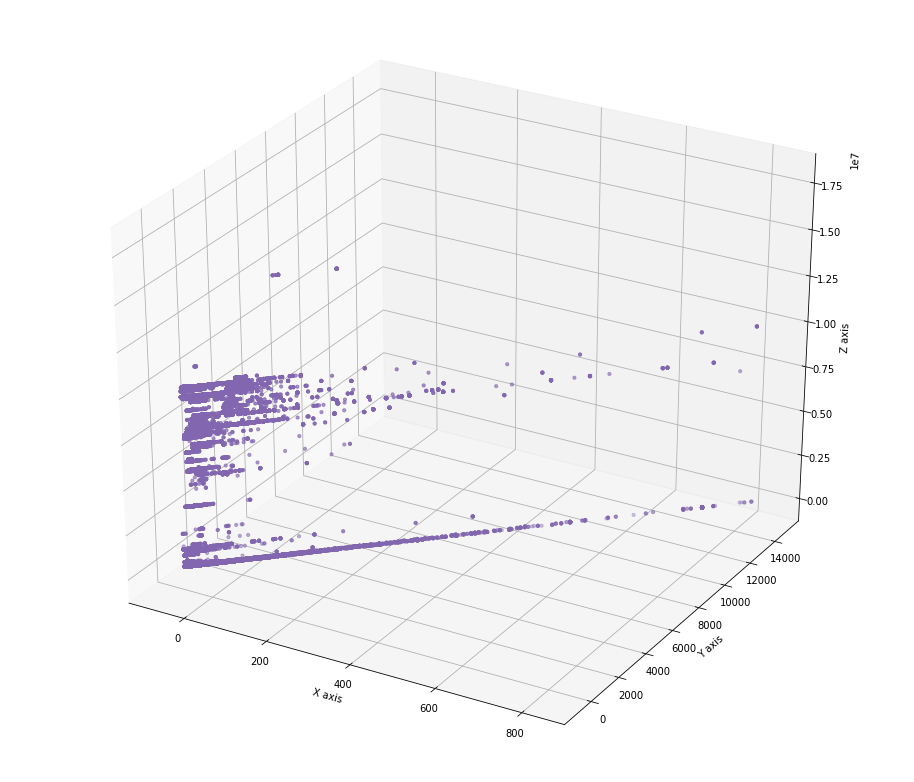

In [7]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
graf = ax.scatter3D(reduction.dim_3, reduction.dim_2, zs=reduction.dim_1, s=10, c='#8266af');

In [8]:
scaled = pd.DataFrame(StandardScaler().fit_transform(dfTrain), columns=dfTrain.columns)
reduction_scaled = pd.DataFrame(svd.fit_transform(scaled), columns=['dim_1', 'dim_2', 'dim_3'])

## Graficando Train Set normalizado y sin price_usd 

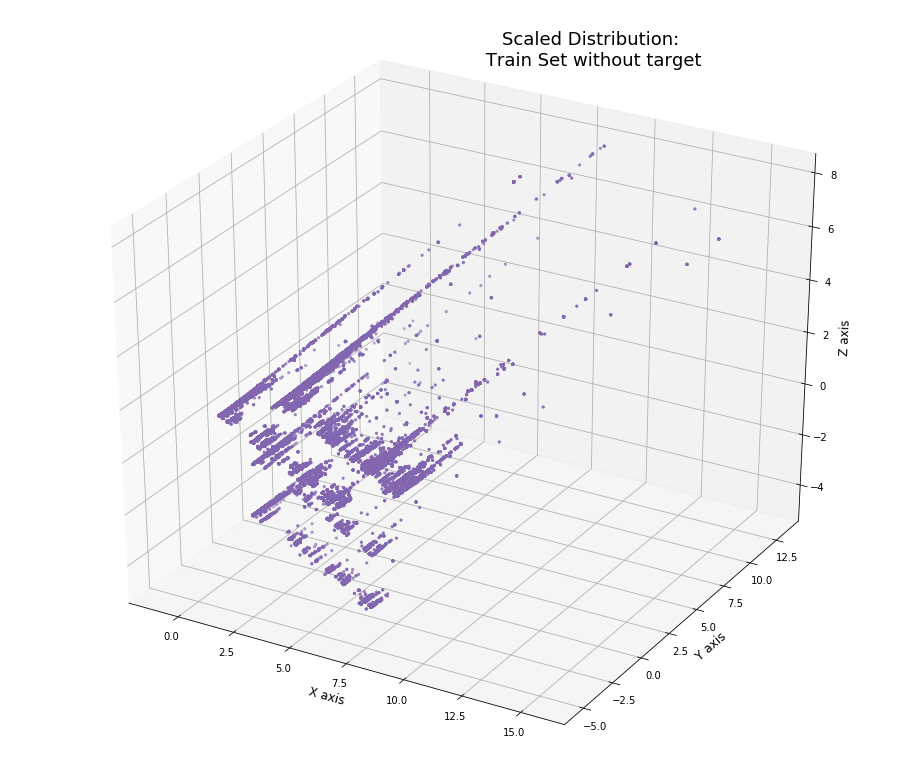

In [9]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_zlabel('Z axis', fontsize=12)
ax.set_title('Scaled Distribution:\n Train Set without target', fontsize=18, x=0.65)
graf = ax.scatter3D(reduction_scaled.dim_1, reduction_scaled.dim_2, zs=reduction_scaled.dim_3, s=5, c='#8266af');

In [10]:
reduction_scaled2 = pd.DataFrame(StandardScaler().fit_transform(dfTrain2), columns=dfTrain2.columns)
reduction_scaled2 = svd.fit_transform(reduction_scaled2)
reduction_scaled2 = pd.DataFrame(reduction_scaled2, columns=['dim_1', 'dim_2', 'dim_3'])

## Graficando Train Set normalizado y con price_usd

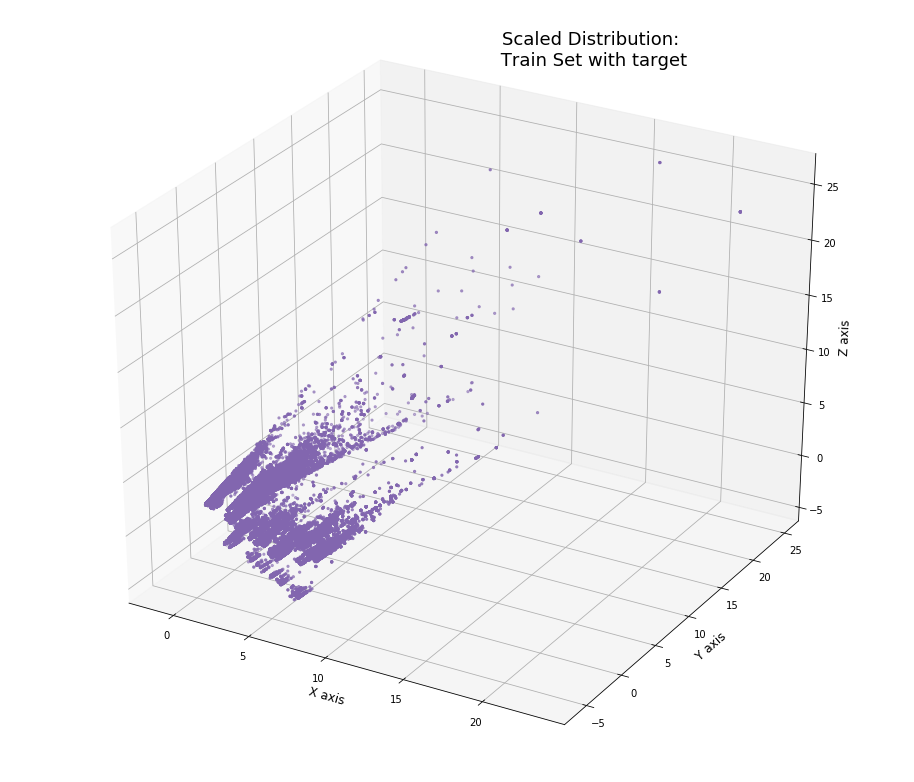

In [11]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_zlabel('Z axis', fontsize=12)
ax.set_title('Scaled Distribution:\n Train Set with target', fontsize=18, x=0.65)
graf = ax.scatter3D(reduction_scaled2.dim_1, reduction_scaled2.dim_2, zs=reduction_scaled2.dim_3, s=5, c='#8266af');